In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
classes = np.sort(np.array(y.unique()))
classes

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## not balanced

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((63000, 784), (7000, 784))

In [7]:
gnb = GaussianNB()

In [8]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [9]:
print(classification_report(y_pred, y_test, target_names=classes))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       802
           1       0.95      0.81      0.87       963
           2       0.28      0.86      0.43       232
           3       0.31      0.75      0.43       277
           4       0.15      0.83      0.26       123
           5       0.05      0.71      0.10        45
           6       0.94      0.64      0.76       993
           7       0.32      0.88      0.47       279
           8       0.68      0.29      0.41      1606
           9       0.94      0.39      0.55      1680

    accuracy                           0.56      7000
   macro avg       0.55      0.69      0.51      7000
weighted avg       0.78      0.56      0.60      7000



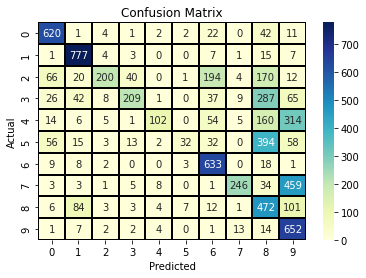

In [10]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', ax=ax, xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor='black')
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

## balanced

In [11]:
for i in range(0,10):
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X[y==str(i)], y[y==str(i)], test_size=0.1, random_state=0)
    # print(X_train_temp.shape, X_test_temp.shape)
    if i==0:
        X_train = X_train_temp.copy()
        X_test = X_test_temp.copy()
        y_train = y_train_temp.copy()
        y_test = y_test_temp.copy()
    else:
        X_train = X_train.append(X_train_temp)
        X_test = X_test.append(X_test_temp)
        y_train = y_train.append(y_train_temp)
        y_test = y_test.append(y_test_temp)
    print(X_train.shape, X_test.shape)

(6212, 784) (691, 784)
(13301, 784) (1479, 784)
(19592, 784) (2178, 784)
(26018, 784) (2893, 784)
(32159, 784) (3576, 784)
(37840, 784) (4208, 784)
(44028, 784) (4896, 784)
(50591, 784) (5626, 784)
(56733, 784) (6309, 784)
(62995, 784) (7005, 784)


In [12]:
gnb = GaussianNB()

In [13]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [14]:
print(classification_report(y_pred, y_test, target_names=classes))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       844
           1       0.94      0.81      0.87       921
           2       0.33      0.87      0.48       264
           3       0.36      0.77      0.49       336
           4       0.15      0.86      0.26       121
           5       0.05      0.60      0.10        55
           6       0.94      0.64      0.76      1013
           7       0.32      0.89      0.47       264
           8       0.65      0.30      0.41      1494
           9       0.95      0.39      0.55      1693

    accuracy                           0.57      7005
   macro avg       0.56      0.69      0.52      7005
weighted avg       0.78      0.57      0.61      7005



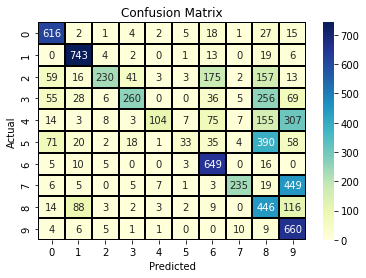

In [16]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', ax=ax, xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor='black')
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()